<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# KNN and Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

## Setup

We are going to use a dataset from the University of Wisconsin which contains features of the cell nuclei present in biopsies of breast masses.  The target to predict is whether the mass is malignant or benign.  Description of the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [2]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer(as_frame=True)
X,y=data.data,data.target
# Since the default in the file is 0=malignant 1=benign we want to reverse these
y=(y==0).astype(int)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Let's set aside a test set and use the remainder for training and cross-validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

# Let's scale the inputs to help it converge more easily
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

# Let's create a model using just two features so we can visualize it
X_train_2feats = X_train_scaled[['worst concave points','worst area']]
X_test_2feats = X_test_scaled[['worst concave points','worst area']]

In [4]:
def plot_decision_boundaries(X,y,model):
    """
    Plots the 2D decision boundary of a classification model
    Parameters:
    X (pandas dataframe): input features
    y (pandas series): target values
    model: trained scikit-learn model object
    """
    markers = ['^','s','v','o','x']
    colors = ['yellow','green','purple','blue','orange']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    for i,k in enumerate(np.unique(y)):
        plt.scatter(X.loc[y.values==k].iloc[:,0],X.loc[y.values==k].iloc[:,1],
                    c=colors[i],marker=markers[i],label=k,edgecolor='black')

    xgrid = np.arange(X.iloc[:,0].min(),X.iloc[:,0].max(),
                      (X.iloc[:,0].max()-X.iloc[:,0].min())/500)
    ygrid = np.arange(X.iloc[:,1].min(),X.iloc[:,1].max(),
                      (X.iloc[:,1].max()-X.iloc[:,1].min())/500)
    xx,yy = np.meshgrid(xgrid,ygrid)
    
    mesh_preds = model.predict(np.c_[xx.ravel(),yy.ravel()])
    mesh_preds = mesh_preds.reshape(xx.shape)
    plt.contourf(xx,yy,mesh_preds,alpha=0.2,cmap=cmap)
    plt.legend()
    return

## PART 1: KNN
For part 1, in the cell below write code to do the following:  
- Train a KNN model using n_neighbors=3 on the X_train_2feats training set. 
- Plot the decision boundaries of your trained model. 
- Calculate the accuracy of your KNN model on the test set
- Display the confusion matrix for your model on the test set

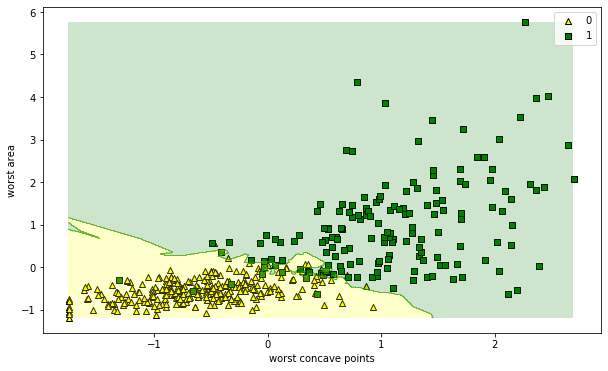

Accuracy is 0.956


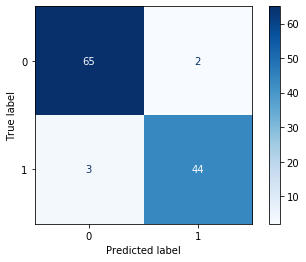

In [5]:
### BEGIN SOLUTION ###

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_2feats,y_train)
plt.figure(figsize=(10,6))
plot_decision_boundaries(X_train_2feats, y_train, knn_model)
plt.xlabel('worst concave points')
plt.ylabel('worst area')
plt.show()

# Display the confusion matrix and calculate accuracy
acc = accuracy_score(y_test,knn_model.predict(X_test_2feats))
print('Accuracy is {:.3f}'.format(acc))
plot_confusion_matrix(knn_model, X_test_2feats, y_test,cmap=plt.cm.Blues,normalize=None)
plt.show()

### END SOLUTION ###

## PART 2: Support Vector Classifiers
### 2.1
We will now try a SVC on our dataset.  In the cells below, create two different SVC models:  
- SVC with a linear kernel. 
- SVC with a RBF kernel. 

For each model, keep the value of C fixed at 1.  Which model yields the highest accuracy on the test set?

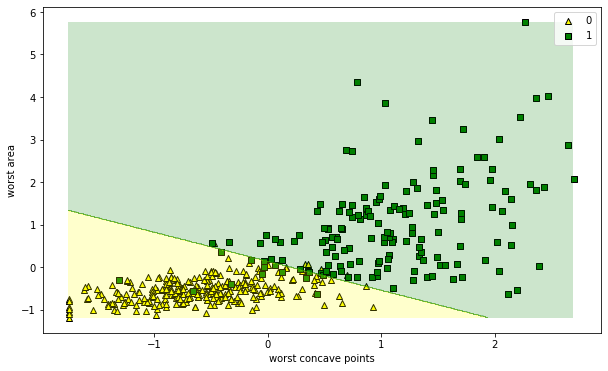

Accuracy of SVC with linear kernel is 0.956


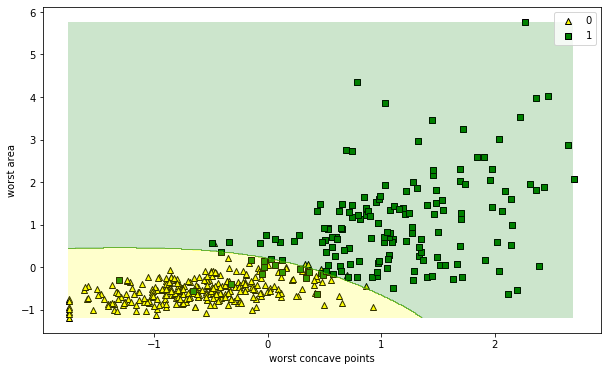

Accuracy of SVC with rbf kernel is 0.965


In [6]:
### BEGIN SOLUTION ###

# Instantiate and train the SVC model on just two features using a linear SVC
model = SVC(kernel='linear', C=1.)
model.fit(X_train_2feats, y_train)
# Display the data and the decision boundary
plt.figure(figsize=(10,6))
plot_decision_boundaries(X_train_2feats, y_train, model)
plt.xlabel('worst concave points')
plt.ylabel('worst area')
plt.show()
# Calculate accuracy
acc = accuracy_score(y_test,model.predict(X_test_2feats))
print('Accuracy of SVC with linear kernel is {:.3f}'.format(acc))

# Instantiate and train the SVC model on just two features using a rbf SVC
model = SVC(kernel='rbf', C=1.)
model.fit(X_train_2feats, y_train)
# Display the data and the decision boundary
plt.figure(figsize=(10,6))
plot_decision_boundaries(X_train_2feats, y_train, model)
plt.xlabel('worst concave points')
plt.ylabel('worst area')
plt.show()
# Calculate accuracy
acc = accuracy_score(y_test,model.predict(X_test_2feats))
print('Accuracy of SVC with rbf kernel is {:.3f}'.format(acc))

### END SOLUTION ###

### 2.2
Now, let's try a polynomial kernel.  Vary the polynomial degree from 2 through 4 and create and train a SVC model with a polynomial kernel of each degree.  For each model, display the resulting decision boundary and calculate the cross-validation accuracy using k=3 (hint: use `cross_val_score()`).  Visually compare the decision boundaries and their performance in classifying the data, and determine which degree has the best performance in classifyign the data.

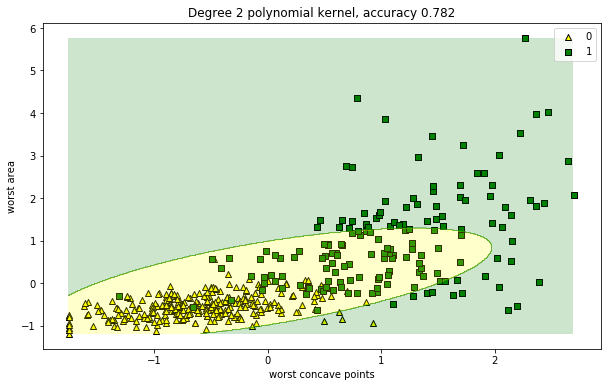

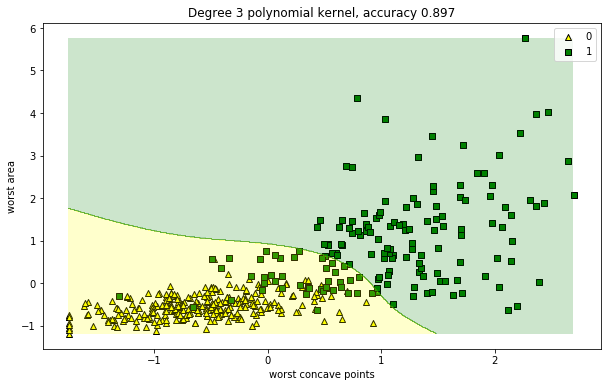

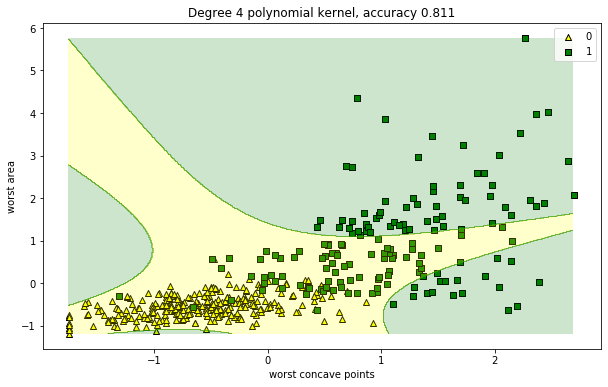

In [7]:
### BEGIN SOLUTION ###

for degree in [2,3,4]:
    
    # Instantiate and train the SVC model on just two features using a polynomial kernel with degree 2
    model = SVC(kernel='poly', degree=degree, C=1.)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model,X_train_2feats,y_train,scoring='accuracy',cv=3)
    cv_acc = np.mean(cv_scores)
    
    # Display the data and the decision boundary
    model.fit(X_train_2feats, y_train)
    plt.figure(figsize=(10,6))
    plot_decision_boundaries(X_train_2feats, y_train, model)
    plt.title(f'Degree {degree} polynomial kernel, accuracy {cv_acc:.3f}')
    plt.xlabel('worst concave points')
    plt.ylabel('worst area')
    plt.show()

### END SOLUTION ###

### 2.3
For the above model that does the best job in classifying the training data, calculate the accuracy and display the confusion matrix for the test set.

Accuracy on the test set is 0.886


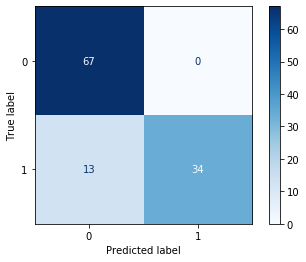

In [8]:
### BEGIN SOLUTION ###

# Display the confusion matrix and calculate accuracy
model = SVC(kernel='poly', degree=3, C=1.)
model.fit(X_train_2feats, y_train)
test_acc = accuracy_score(y_test,model.predict(X_test_2feats))
print('Accuracy on the test set is {:.3f}'.format(test_acc))
plot_confusion_matrix(model, X_test_2feats, y_test,cmap=plt.cm.Blues,normalize=None)
plt.show()

### END SOLUTION ###